<a href="https://colab.research.google.com/github/IC-03/Royal-Flush/blob/main/Royal_Flush_Classification_Models_For_A_Poker_Hands_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Royal Flush: Classification models for a Poker Hands Dataset
---

![](https://drive.google.com/uc?export=view&id=1KyVqgF2ZzPquw5sAtSzY8IPgt-tc-Dfh)

---

## ♠ About
**Autores**: Isabella Callejas Mandon, Geiner Duvan Guevara Vargas.

**Objetivo**: Clasificar manos de póquer según la combinación que presenten las cartas.

**Disclaimer**: Este proyecto no buscar incentivar a los juegos de azar, esto es para experimentar.

El dataset fue conseguido aquí: [Keel Datasets](https://sci2s.ugr.es/keel/dataset.php?cod=194)

---

## ♣ Contexto
En una baraja estándar de póquer tiene cada carta tiene dos atributos:

- Un palo o suit (S): Corazón, Trebol, Diamante, Picas. Representación respectiva [ 1-4 ]

- Un rango (C): Ace (A), 2-10, Jack o Joker (J), Queen (Q), King (K). Representación respectiva [ 1-13 ].

Es decir, tenemos 13 cartas por cada palo = 13*4 = 52 cartas en total.
Tampoco se tiene en cuenta si las cartas tienen un valor, nos interesan las combinaciones de estas.

Ejemplo:
![](https://drive.google.com/uc?export=view&id=1J_A4gEA7lfiSB3T2LLbCKGCZV5JCeWGw)

Por otra parte, una **mano de poquer** consiste en 5 cartas, hay combinaciones muy específicas que se pueden **clasificar** de la siguiente manera.

[ 0 ] **Nada en mano**: No entra en las otras clasificaciones

![](https://drive.google.com/uc?export=view&id=1C8LWL5HYU_I1jeh0RfYWq6sRJ2Rs795N)

[ 1 ] **Un par**: Dos cartas con el misma rango

![](https://drive.google.com/uc?export=view&id=1ahscQb47MuU9ukC7fd_jLnvH_nNuZVDP)

[ 2 ] **Dos pares**: Dos pares de cartas, los pares son diferentes entre sí

![](https://drive.google.com/uc?export=view&id=1T65kwB1GpUNuqnc89fDGy7uT3ZEeVIcy)

[ 3 ] **Trio**: 3 cartas con la misma letra o número

![](https://drive.google.com/uc?export=view&id=1C1gOmFzB-Ervz4NPxSDiDADNt3stkENR)

[ 4 ] **Escalera**: Las 5 cartas son secuenciales sin importar el palo

![](https://drive.google.com/uc?export=view&id=1qpSiO7IyEirJ6n_P8nNGfoK33BQ6b2xU)

[ 5 ] **Flush/ Color/ Flor**: 5 cartas del mismo palo

![](https://drive.google.com/uc?export=view&id=1wG3BL33F3mmqmDxzhWzQeRc7vxAVf3ak)

[ 6 ] **Full House**: Trio + Par

![](https://drive.google.com/uc?export=view&id=1ort3P87a9XbwSer8jps_670LvFk8drgp)

[ 7 ] **Cuarto de un tipo** : 4 cartas de un mismo rango pero diferentes palos.

[ 8 ] **Escalera de color**: Las 5 cartas son secuenciales y del mismo palo

![](https://drive.google.com/uc?export=view&id=1DqQi_HzrWcZa8J_Ota5Wj4YXV1lYZrAA)

[ 9 ] **Flor Imperial / Royal Flush**: As, K, Q, J, 10 y del mismo palo

![](https://drive.google.com/uc?export=view&id=1HZ-bEq_cbW8ISEQPI42RHRfgIlXN5F3L)

Los icónos diseñados por: [riajulislam](https://www.flaticon.es/packs/playing-cards-16?k=1695384261518&log-in=google)


In [2]:
# @title Importamos las librerías necesarias
import sklearn
import pandas as pd
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Nuevas librerias para la segunda entrega

#1. Dividir dataset en entrenamiento y de prueba
from sklearn.model_selection import train_test_split

#2. Modelos de clasificacion
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#3.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#4.
from sklearn.metrics import *
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#5. Graficar el decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image

#6. Personalizar matplotlib en presentación de seaborn
sns.set_theme()

## 🃏 Explorando el Dataset

In [3]:
# @title Accediendo al archivo .csv desde github
poker = pd.read_csv("https://raw.githubusercontent.com/IC-03/Royal-Flush/main/Dataset/poker.csv")
X = poker.values[:,:-1] # X: input columns
y = poker.values[:,-1]  # y: colum to be predicted

In [ ]:
#@title Información de los datos
poker.info()

<ipython-input-7-5f5765e6dd35>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


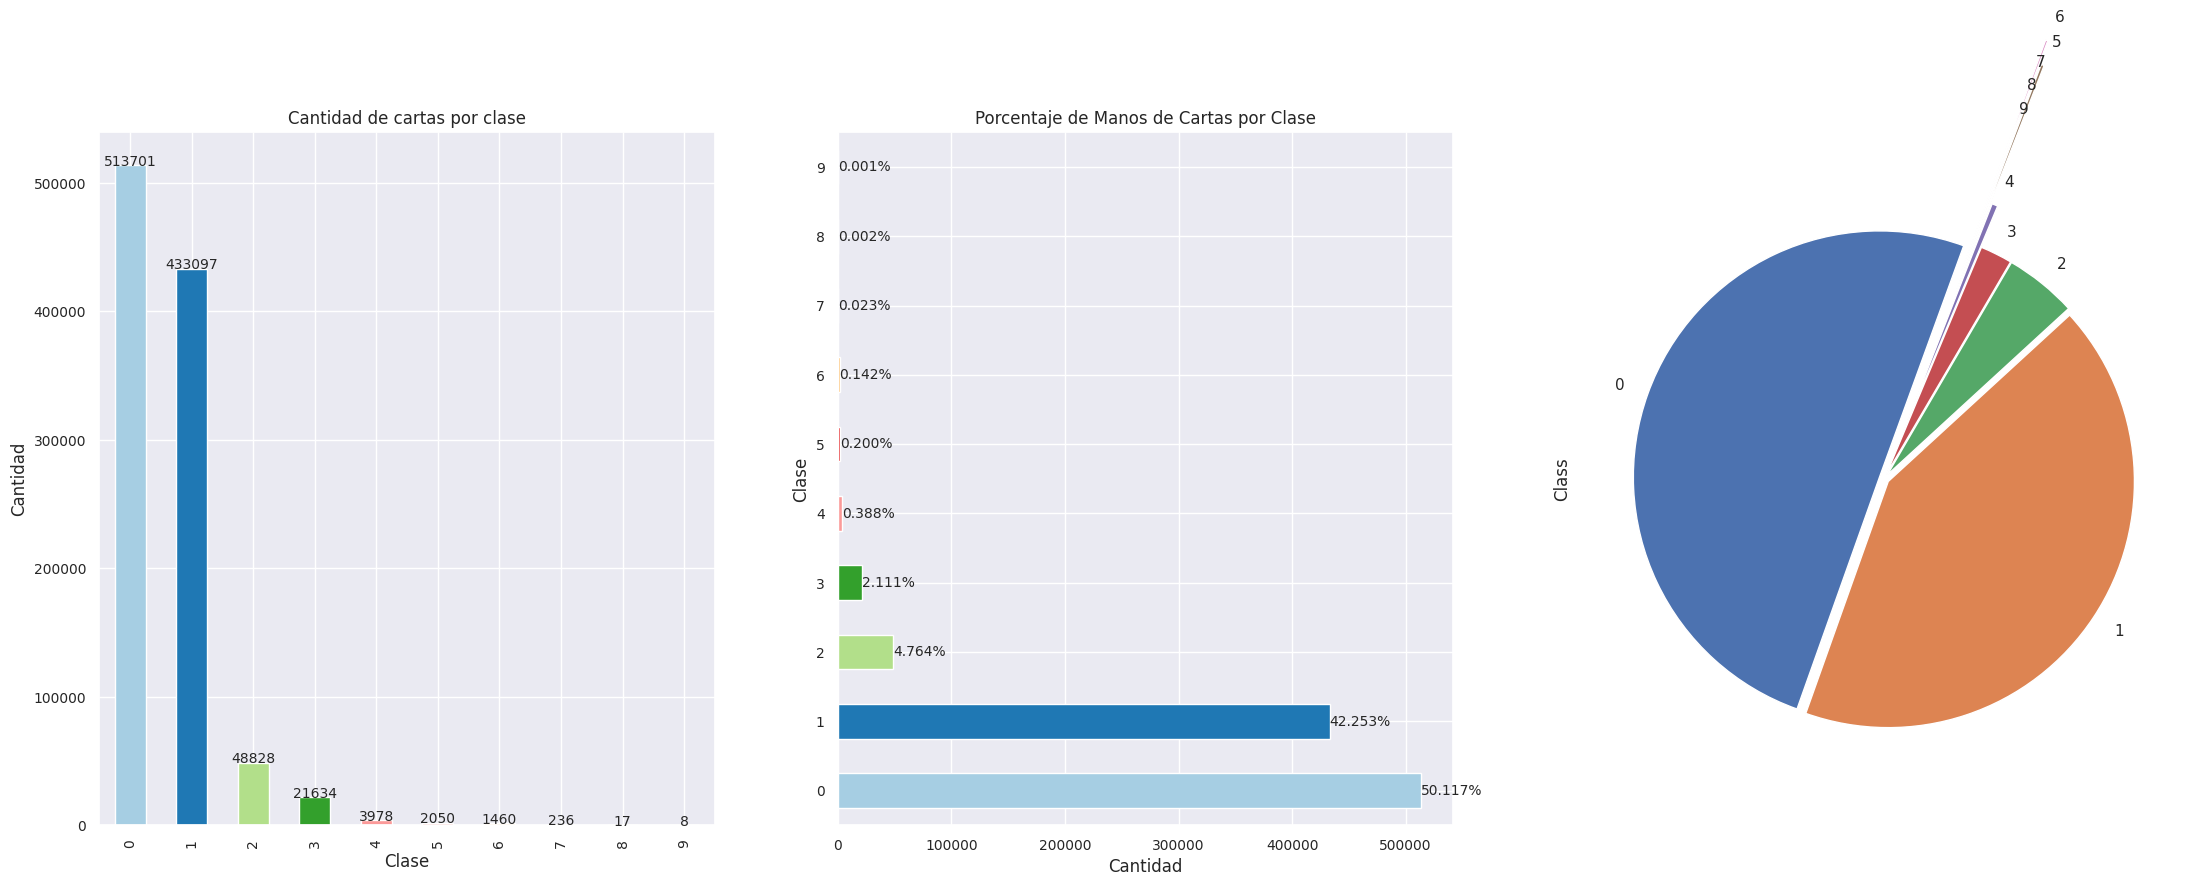

In [ ]:
#@title Primera Entrega
plt.subplots(figsize=(27,9))

#Grafica de barras del tipo de Mano por Clases
plt.subplot(1,3,1)
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")

label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]

class_poker.plot( kind='bar', xlabel='Clase', ylabel='Cantidad', layout='constrained', title='Cantidad de cartas por clase',
                  xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=10)

for i, total in enumerate(class_poker):
  plt.text(i, total + 0.5, round(total), ha = 'center', size='small')


#Gráfica de barras
plt.subplot(1,3,2)
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")
label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]
class_poker.plot( kind='barh', xlabel='Cantidad', ylabel='Clase', layout='constrained', title='Porcentaje de Manos de Cartas por Clase',
                   xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=10)
total = class_poker.values.sum()
for i in range (len(class_poker)):
   cnt = class_poker[i]
   pcnt = '{:0.3f}%'.format(100*cnt/total)
   plt.text(cnt-20, i, pcnt, va ='center', size='small')

#Gráfica Circular o Pie
plt.subplot(1,3,3)
class_poker = poker["Class"].value_counts()
explode = (0.02, 0.02, 0.02, 0.02, 0.20, 0.80, 0.90, 0.70, 0.60, 0.50) #Para sacar los pedacitos de "torta"
class_poker.plot(kind="pie", autopct=None, startangle=70, legend=False, explode=explode)


plt.show()

<ipython-input-8-a843215822c7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1)


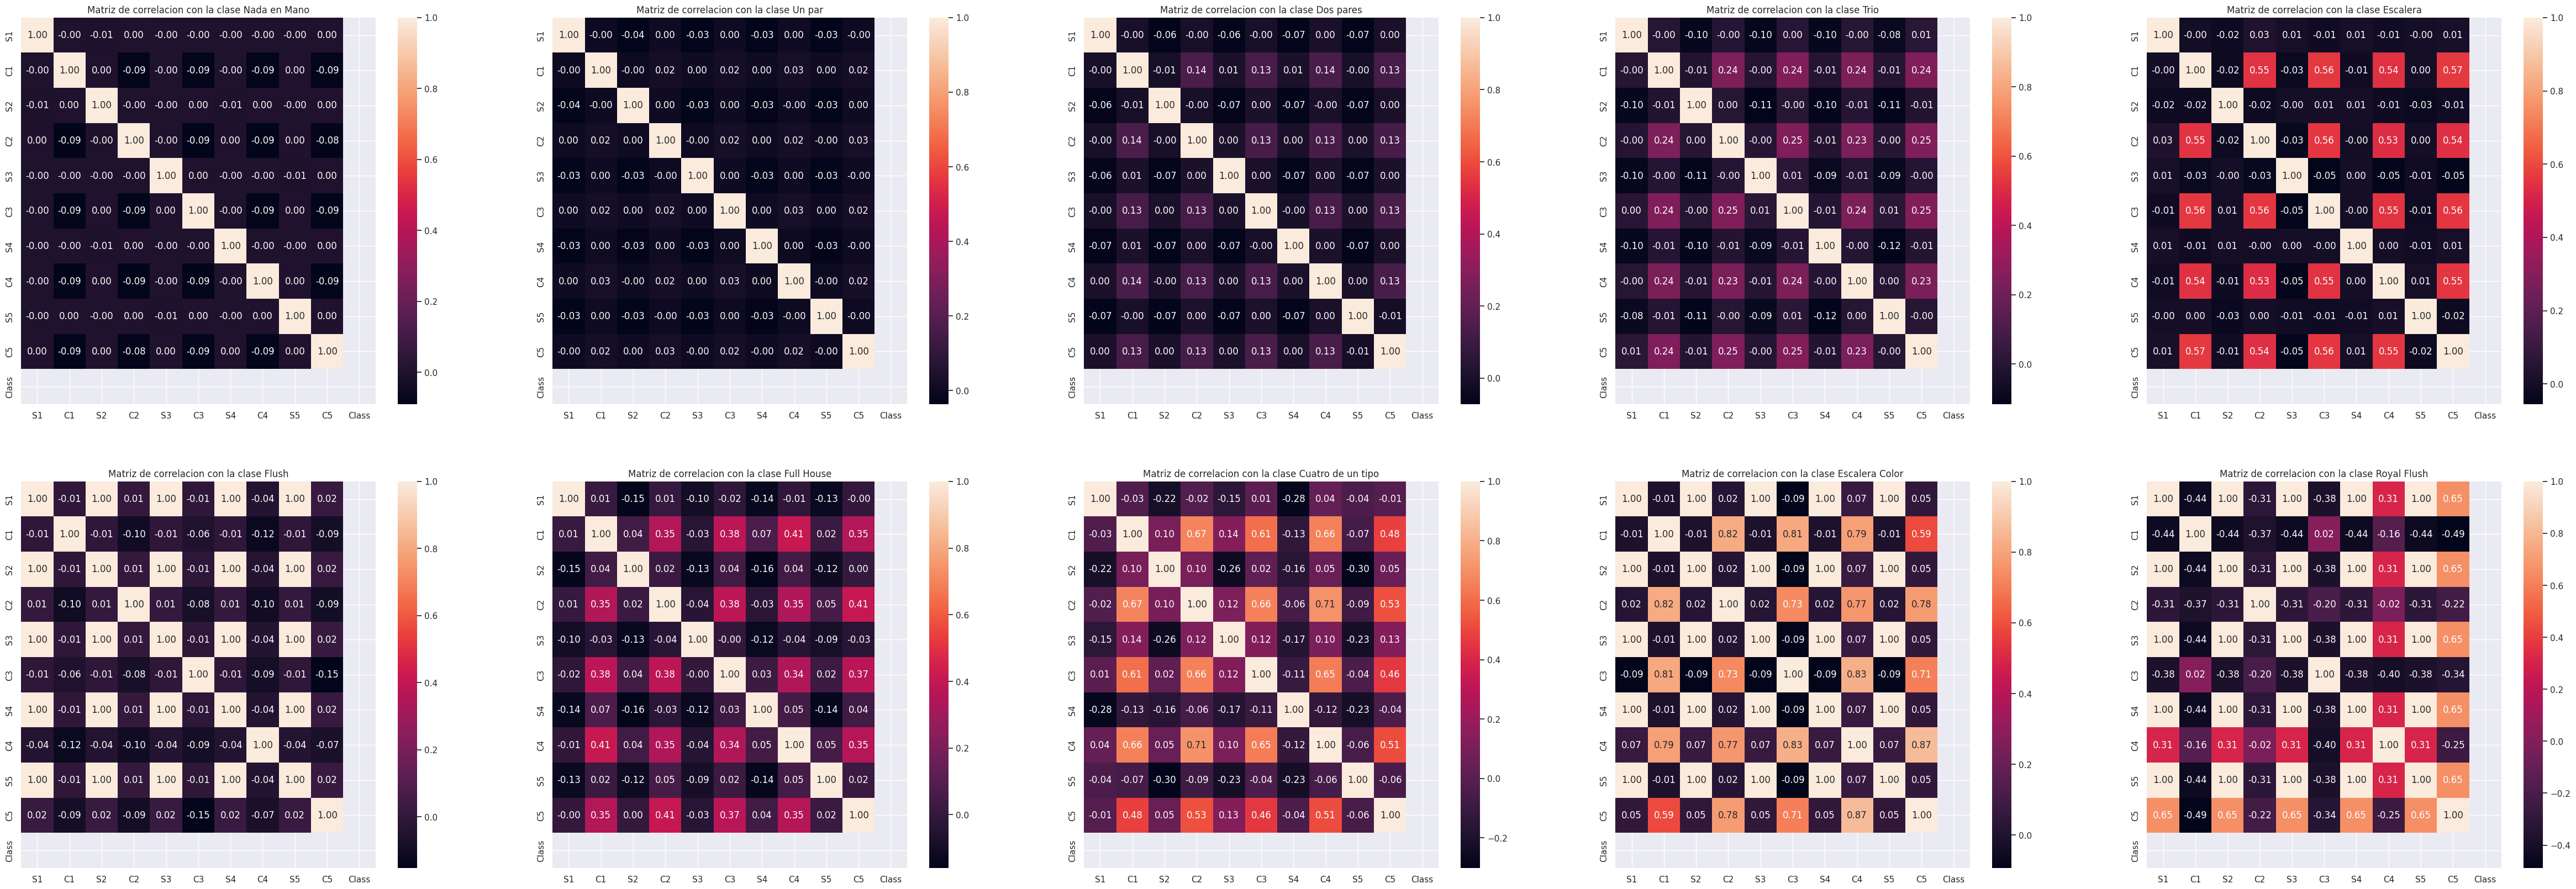

In [ ]:
# @title Matrices de correlación de cada clase
plt.subplots(figsize=(60,20)) #Importante para que se vean todas las correlaciones
plt.subplot(2,5,1)
plt.title("Matriz de correlacion con la clase Nada en Mano")
corr = poker[poker.Class==0].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,2)
plt.title("Matriz de correlacion con la clase Un par")
corr = poker[poker.Class==1].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,3)
plt.title("Matriz de correlacion con la clase Dos pares")
corr = poker[poker.Class==2].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,4)
plt.title("Matriz de correlacion con la clase Trio")
corr = poker[poker.Class==3].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,5)
plt.title("Matriz de correlacion con la clase Escalera")
corr = poker[poker.Class==4].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,6)
plt.title("Matriz de correlacion con la clase Flush")
corr = poker[poker.Class==5].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,7)
plt.title("Matriz de correlacion con la clase Full House")
corr = poker[poker.Class==6].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,8)
plt.title("Matriz de correlacion con la clase Cuatro de un tipo")
corr = poker[poker.Class==7].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,9)
plt.title("Matriz de correlacion con la clase Escalera Color")
corr = poker[poker.Class==8].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,10)
plt.title("Matriz de correlacion con la clase Royal Flush")
corr = poker[poker.Class==9].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

plt.show()

### Resumen de nuestro Dataset
1. Poseemos un dataset que principalmente se presta para clasificación de 10 tipos de manos de poquer
2. Contamos con un total de 1'025.009 de datos, sin embargo, la cantidad de registros que poseemos por mano de póquer no es muy balanceado por la misma naturaleza del juego y en comparación a las combinaciones totales tenemos solo un 39.4%  [[ 1 ]](https://es.wikipedia.org/wiki/Manos_de_p%C3%B3quer#Probabilidades)
3. Todos los registros fueron abstraídos y representados en números enteros.
4. Lo que buscamos principalmente es que los modelos que apliquemos a este dataset a lo largo del curso es que puedan reconocer el tipo de mano que posee en cualquier palo y orden de acuerdo a las reglas que viene para cada tipo de mano.

## Funciones de Tunning

In [4]:
# @title Funciones de Tuning DT
def show_curve_DT_Criterion():
    means, stds = [], []
    criterion_choice = ['gini', 'entropy', 'log_loss']
    for cri in criterion_choice:
        est= DecisionTreeClassifier(criterion=cri)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(criterion_choice, means, label="mean", color="black")
    plt.fill_between(criterion_choice, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("criterion")
    plt.ylabel("performance")
    plt.legend()
    return criterion_choice[np.argmax(means)]

def show_curve_DT_Depth():
    means, stds = [], []
    depth_range = range(2,60,2)
    for max in depth_range:
        est= DecisionTreeClassifier(max_depth=max)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(depth_range, means, label="mean", color="black")
    plt.fill_between(depth_range, means-stds, means+stds, color="crimson", alpha=.5, label="std")
    plt.xlabel("max_depth")
    plt.ylabel("performance")
    plt.legend()
    return depth_range[np.argmax(means)]

In [5]:
# @title Funciones de Tuning RF
def show_curve_RF_Estimator():
    means, stds = [], []
    estimators_range = range(100,501,10)
    for estim in estimators_range:
        est= RandomForestClassifier(n_estimators=estim)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(estimators_range, means, label="mean", color="black")
    plt.fill_between(estimators_range, means-stds, means+stds, color="crimson", alpha=.5, label="std")
    plt.xlabel("n_estimators")
    plt.ylabel("performance")
    plt.legend()
    return estimators_range[np.argmax(means)]

def show_curve_RF_Criterion():
    means, stds = [], []
    criterion_choice = ['gini', 'entropy', 'log_loss']
    for cri in criterion_choice:
        est= RandomForestClassifier(criterion=cri)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(criterion_choice, means, label="mean", color="black")
    plt.fill_between(criterion_choice, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("criterion")
    plt.ylabel("performance")
    plt.legend()
    return criterion_choice[np.argmax(means)]

def show_curve_RF_Depth():
    means, stds = [], []
    depth_range = range(2,60,2)
    for max in depth_range:
        est= RandomForestClassifier(max_depth=max)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(depth_range, means, label="mean", color="black")
    plt.fill_between(depth_range, means-stds, means+stds, color="crimson", alpha=.5, label="std")
    plt.xlabel("max_depth")
    plt.ylabel("performance")
    plt.legend()
    return depth_range[np.argmax(means)]

In [6]:
# @title Funciones de Tuning SVM
def show_curve_SVC_kernel():
    means, stds = [], []
    kernel_choice = ['linear', 'poly', 'rbf']
    for ker in kernel_choice:
        est= SVC(kernel=ker)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(kernel_choice, means, label="mean", color="black")
    plt.fill_between(kernel_choice, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("Kernel")
    plt.ylabel("performance")
    plt.legend()
    return kernel_choice[np.argmax(means)]

def show_curve_SVC_C_ln():
    means, stds = [], []
    c_range = np.linspace(0.01, 10.0, 10)
    for c in c_range:
        est= SVC(C=c,kernel='linear')
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("C_linear")
    plt.ylabel("performance")
    plt.legend()
    return c_range[np.argmax(means)]

def show_curve_SVC_C_poly():
    means, stds = [], []
    c_range = np.linspace(0.01, 10.0, 10)
    for c in c_range:
        est= SVC(C=c,kernel='poly')
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("C_Poly")
    plt.ylabel("performance")
    plt.legend()
    return c_range[np.argmax(means)]

def show_curve_SVC_degree_poly():
    means, stds = [], []
    degree_range = range(2,15)
    for deg in degree_range:
        est= SVC(kernel='poly', degree=deg)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(degree_range, means, label="mean", color="black")
    plt.fill_between(degree_range, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("Grado")
    plt.ylabel("performance")
    plt.legend()
    return degree_range[np.argmax(means)]

def show_curve_SVC_C_rbf():
    means, stds = [], []
    c_range = np.linspace(0.01, 10.0, 10)
    for c in c_range:
        est= SVC(C=c,kernel='rbf')
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("C_rbf")
    plt.ylabel("performance")
    plt.legend()
    return c_range[np.argmax(means)]

# 🤖 Aplicando los diferentes modelos de clasificación vistos en clase

Los modelos de clasificación aplicados en este dataset hasta la fecha:
1. Gaussian Naive Bayes
2. Decision Tree
3. Random Forest
4. SVM (lineal)
5. SVM (polynomial)
6. SVM (RBF)



In [ ]:
#@title Dataset pre-balance
poker = pd.read_csv("https://raw.githubusercontent.com/IC-03/Royal-Flush/main/Dataset/poker.csv")

X = poker.values[:,:-1] # X: input columns
y = poker.values[:,-1]  # y: colum to be predicted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
#@title Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNV = GNB.predict(X_test)
print(accuracy_score(y_pred_GNV, y_test))
s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_GNV))

0.5014634003570697
accuracy con cross validation 0.50117 (+/- 0.00107)
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    102801
           1       0.00      0.00      0.00     86660
           2       0.00      0.00      0.00      9720
           3       0.00      0.00      0.00      4302
           4       0.00      0.00      0.00       787
           5       0.00      0.00      0.00       412
           6       0.00      0.00      0.00       275
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.50    205002
   macro avg       0.05      0.10      0.07    205002
weighted avg       0.25      0.50      0.33    205002



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT =DT.predict(X_test)
print(accuracy_score(y_pred_DT, y_test))
s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_DT))

0.5845162486219647
accuracy con cross validation 0.57887 (+/- 0.00395)
              precision    recall  f1-score   support

           0       0.60      0.81      0.69    102801
           1       0.56      0.41      0.48     86660
           2       0.46      0.02      0.04      9720
           3       0.84      0.03      0.06      4302
           4       0.25      0.00      0.01       787
           5       0.95      0.09      0.17       412
           6       0.67      0.05      0.09       275
           7       1.00      0.02      0.05        42
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.58    205002
   macro avg       0.53      0.15      0.16    205002
weighted avg       0.58      0.58      0.55    205002



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'entropy'

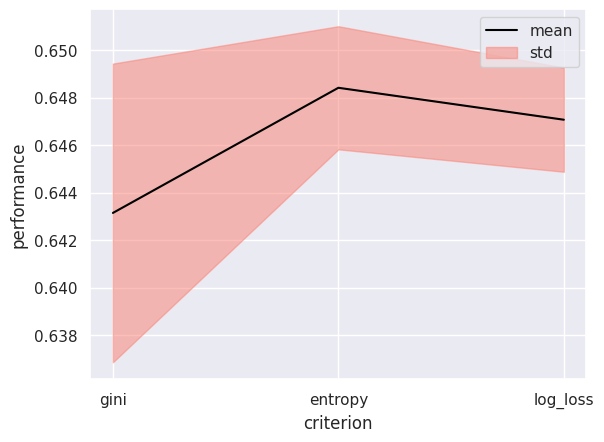

In [ ]:
show_curve_DT_Criterion()

24

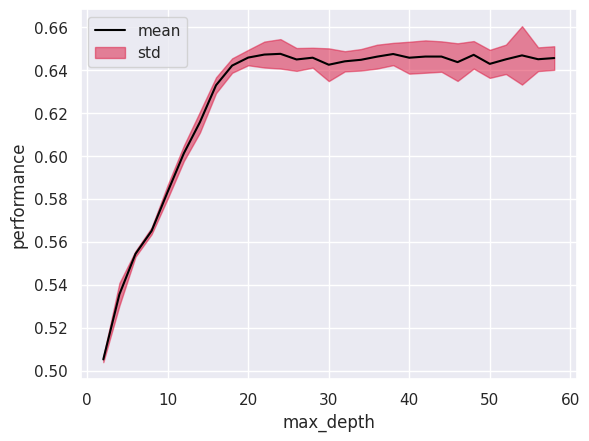

In [ ]:
show_curve_DT_Depth()

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=24)
DT.fit(X_train,y_train)
y_pred_DT =DT.predict(X_test)
print(accuracy_score(y_pred_DT, y_test))
s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_DT))

0.6487741583008946
accuracy con cross validation 0.64799 (+/- 0.00356)
              precision    recall  f1-score   support

           0       0.73      0.73      0.73    102801
           1       0.61      0.62      0.61     86660
           2       0.30      0.28      0.29      9720
           3       0.36      0.31      0.33      4302
           4       0.28      0.18      0.22       787
           5       0.07      0.10      0.08       412
           6       0.10      0.09      0.09       275
           7       0.29      0.24      0.26        42
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.65    205002
   macro avg       0.27      0.25      0.26    205002
weighted avg       0.65      0.65      0.65    205002



In [ ]:
#@title Random Forest
RF = RandomForestClassifier() #los parametros más importantes on maxdepth and n_estimators
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_RF))

In [ ]:
show_curve_RF_Criterion()

In [ ]:
show_curve_RF_Depth()

In [ ]:
show_curve_RF_Estimator()

In [ ]:
RF = RandomForestClassifier(n_estimators= , criterion= , max_depth= ) #los parametros más importantes on maxdepth and n_estimators
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_RF))

In [ ]:
#@title SVM (lineal)
SVM_ln = SVC(kernel='linear')
SVM_ln.fit(X_train,y_train)
y_pred_SVM_ln = SVM_ln.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_ln))

In [ ]:
show_curve_SVC_C_ln()

In [ ]:
SVM_ln = SVC(C= ,kernel='linear')
SVM_ln.fit(X_train,y_train)
y_pred_SVM_ln = SVM_ln.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_ln))

In [ ]:
#@title SVM (polynomial)
SVM_poly = SVC(kernel='poly')
SVM_poly.fit(X_train,y_train)
y_pred_SVM_poly = SVM_poly.predict(X_test)
print(accuracy_score(y_pred_SVM_poly, y_test))
s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_poly))

In [ ]:
show_curve_SVC_C_poly()

In [ ]:
show_curve_SVC_degree_poly()

In [ ]:
SVM_poly = SVC(C= , kernel='poly', degree=)
SVM_poly.fit(X_train,y_train)
y_pred_SVM_poly = SVM_poly.predict(X_test)
print(accuracy_score(y_pred_SVM_poly, y_test))
s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_poly))

In [ ]:
#@title SVM (RBF)
SVM_rbf = SVC()
SVM_rbf.fit(X_train,y_train)
y_pred_SVM_rbf= SVM_rbf.predict(X_test)
print(accuracy_score(y_pred_SVM_rbf, y_test))
s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_rbf))

In [ ]:
show_curve_SVC_C_rbf()

In [ ]:
SVM_rbf = SVC(C= , kernel='rbf')
SVM_rbf.fit(X_train,y_train)
y_pred_SVM_rbf= SVM_rbf.predict(X_test)
print(accuracy_score(y_pred_SVM_rbf, y_test))
s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_rbf))

## 📊 Arreglando el problema de desbalace de clases



In [6]:
# @title Clase: 0 -> Eliminar datos (perdida de información)
clase_0 = poker[poker['Class'] == 0]
clase_0 = sklearn.utils.shuffle(clase_0)
clase_0.drop(clase_0.index[480:513702], inplace=True)
print(clase_0.shape)

(480, 11)


In [7]:
# @title Clase: 1 -> Eliminar datos (perdida de información)
clase_1 = poker[poker['Class'] == 1]
clase_1 = sklearn.utils.shuffle(clase_1)
clase_1.drop(clase_1.index[480:433098], inplace=True)
print(clase_1.shape)

(480, 11)


In [8]:
# @title Clase: 2  -> Eliminar datos (perdida de información)
clase_2 = poker[poker['Class'] == 2]
clase_2 = sklearn.utils.shuffle(clase_1)
clase_2.drop(clase_2.index[480:433098], inplace=True)
print(clase_2.shape)

(480, 11)


In [9]:
# @title Clase: 3 -> Eliminar datos (perdida de información)
from itertools import permutations,combinations

clase_3 = poker[poker['Class'] == 3]

# lista_cartas, lista_final, perm, fila,filas, filas_end, filas_30 , filas_3, pareja =[], [], [], [], [],[],[], [], []
# palo_3 = [1,2,3,4]
# cartas_30 = [1,2,3,4,5,6,7,8,9,10,11]
# cartas_3 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# indices_palo = [0, 2, 4]
# indices_palo_2 = [6, 8]
# indices_carta = [1,3,5,7,9]

# for car in cartas_30:
#   carta_3 =[]
#   for c in cartas_3:
#     for b in cartas_3:
#       carta_3 = [car, car+1 ,car+2 ,c , b]
#       lista_cartas.append(carta_3)

# lista_temp = []
# perm_palo = list(combinations(palo_3, 3))
# perm_palo_2 = list(combinations(palo_3, 2))
# for pal in perm_palo:
#   for carta in lista_cartas:
#     carta = carta.copy()
#     for pa, index in zip(list(pal),indices_palo):
#       carta.insert(index, pa)
#     lista_temp.append(carta)
# for pal in perm_palo_2:
#   for carta in lista_temp:
#     carta = carta.copy()
#     for pa, index in zip(list(pal),indices_palo_2):
#       carta.insert(index, pa)
#     lista_final.append(carta)

# # agrupo en parejas
# for carta in lista_final:
#   carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
#   filas.append(carta)

# # Elimino cartas repetidas
# for sublista in filas:
#    if len(sublista) == len(set(map(tuple, sublista))):
#     filas_end.append(sublista)

# for carta in filas_end:
#   perm = list(permutations(carta))
#   for cart in perm:
#     fila = list(cart)
#     filas_30.append(fila)

# # Extiendo las listas
# for carta in filas_30:
#     pareja = []
#     for sublista in carta:
#         pareja.extend(sublista)
#     pareja.insert(10,3)
#     filas_3.append(pareja)

# clase_3 = pd.DataFrame(filas_3, columns=clase_3.columns)
clase_3 = sklearn.utils.shuffle(clase_3)
clase_3.drop(clase_3.index[480:21635], inplace=True)
print(clase_3.shape)

(480, 11)


In [10]:
# @title Clase: 4 -> Aumento de datos
from itertools import permutations,combinations

clase_4 = poker[poker['Class'] == 4]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_40 , filas_4, pareja =[], [], [], [], [],[],[], [], []
palo_4 = [1,2,3,4]
cartas_4 = [1,2,3,4,5,6,7,8,9]
indices_palo = [0, 2, 4, 6,8]
indices_carta = [1,3,5,7,9]

for car in cartas_4:
  carta_4 = [car, car+1 ,car+2 ,car+3 , car+4]
  lista_cartas.append(carta_4)

lista_temp = []
perm_palo = list(permutations(palo_4,))

for pal in perm_palo:
  for carta in lista_cartas:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo):
      carta.insert(index, pa)
    lista_temp.append(carta)

#Agrego en la posicion 8 el palo de la carta aleatoria
for pal in palo_4:
  for cart in lista_temp:
    cart =cart.copy()
    cart.insert(8, pal)
    lista_final.append(cart)

# agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_40.append(fila)

# Extiendo las listas
for carta in filas_40:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,4)
    filas_4.append(pareja)

clase_4 = pd.DataFrame(filas_4, columns=clase_4.columns)
clase_4 = sklearn.utils.shuffle(clase_4)
clase_4.drop(clase_4.index[480:7000000], inplace=True)
print(clase_4.shape)

(480, 11)


In [11]:
# @title Clase: 5 -> Aumento de datos
from itertools import permutations,combinations

clase_5 = poker[poker['Class'] == 5]
perm, fila, filas_5 =[], [], []
palo_5 = [1,2,3,4]
carta_5 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4, 6, 8]

perm = list(permutations(carta_5, 5)) #Lista de Todas las permutaciones
for carta in perm:
  for palo in palo_5:
    fila = list(carta)
    for index in indices_palo:
      fila.insert(index, palo)
    fila.insert(10,5)
    filas_5.append(fila)
clase_5 = pd.DataFrame(filas_5, columns=clase_5.columns)
clase_5 = sklearn.utils.shuffle(clase_5)
clase_5.drop(clase_5.index[480:70000000], inplace=True)
print(clase_5.shape)

(480, 11)


In [12]:
# @title Clase: 6 -> Aumento de datos
from itertools import permutations,combinations

clase_6 = poker[poker['Class'] == 6]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_60 , filas_6, pareja =[], [], [], [], [],[],[], [], []
palo_6 = [1,2,3,4]
cartas_6 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4]
indices_palo_2 = [6, 8]
indices_carta = [1,3,5,7,9]

for car in cartas_6:
  carta_6 =[]
  for c in cartas_6:
    carta_6 = [car, car ,car ,c , c]
    lista_cartas.append(carta_6)

lista_temp = []
perm_palo = list(combinations(palo_6, 3))
perm_palo_2 = list(combinations(palo_6, 2))
for pal in perm_palo:
  for carta in lista_cartas:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo):
      carta.insert(index, pa)
    lista_temp.append(carta)
for pal in perm_palo_2:
  for carta in lista_temp:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo_2):
      carta.insert(index, pa)
    lista_final.append(carta)

# agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_60.append(fila)

# Extiendo las listas
for carta in filas_60:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,6)
    filas_6.append(pareja)

clase_6 = pd.DataFrame(filas_6, columns=clase_6.columns)
clase_6 = sklearn.utils.shuffle(clase_6)
clase_6.drop(clase_6.index[480:70000000], inplace=True)
print(clase_6.shape)

(480, 11)


In [13]:
# @title Clase: 7 -> Aumento de datos
from itertools import permutations

clase_7 = poker[poker['Class'] == 7]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_70 , filas_7, pareja =[], [], [], [], [],[],[], [], []
palo_7 = [1,2,3,4]
cartas_7 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4, 6]
indices_carta = [1,3,5,7,9]

for car in cartas_7:
  carta_7 =[]
  for c in cartas_7:
    carta_7 = [car, car ,car ,car , c]
    for palo, index in zip(palo_7,indices_palo):
      carta_7.insert(index, palo)
      lista_cartas.append(carta_7)

#Agrego en la posicion 8 el palo de la carta aleatoria
contador = 1
for cart in lista_cartas:
  cart =cart.copy()
  cart.insert(8, contador)
  lista_final.append(cart)
  contador += 1
  if contador > 4:
    contador = 1

# Agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_70.append(fila)

for carta in filas_70:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,7)
    filas_7.append(pareja)

clase_7 = pd.DataFrame(filas_7, columns=clase_7.columns)
clase_7 = sklearn.utils.shuffle(clase_7)
clase_7.drop(clase_7.index[480:433098], inplace=True)
print(clase_7.shape)

(480, 11)


In [14]:
# @title Clase: 8 -> Aumento de datos
from itertools import permutations

clase_8 = poker[poker['Class'] == 8]

perm, fila, filas_8 =[], [], []
palo_8 = [1,2,3,4]
indices_palo = [0, 2, 4, 6, 8]

for init_carta in [1,2,3,4,5,6,7,8,9]:
  carta_8 = [init_carta, init_carta+1 ,init_carta+2 ,init_carta+3 ,init_carta+4]
  perm = list(permutations(carta_8))
  for carta in perm:
      for palo in palo_8:
          fila = list(carta)
          for index in indices_palo:
            fila.insert(index, palo)
          fila.insert(10,8)
          filas_8.append(fila)
clase_8 = pd.DataFrame(filas_8, columns=clase_8.columns)
clase_8 = sklearn.utils.shuffle(clase_8)
clase_7.drop(clase_7.index[480:433098], inplace=True)
print(clase_8.shape)

(4320, 11)


In [15]:
# @title Clase: 9 -> Aumento de datos
from itertools import permutations

clase_9 = poker[poker['Class'] == 9]
perm, fila, filas_9 =[], [], []
palo_9 = [1,2,3,4]
carta_9 = [1,10,11,12,13]
indices_palo = [0, 2, 4, 6, 8]

perm = list(permutations(carta_9)) #Lista de Todas las permutaciones

for carta in perm:
    for palo in palo_9:
        fila = list(carta)
        for index in indices_palo:
          fila.insert(index, palo)
        fila.insert(10,9)
        filas_9.append(fila)
clase_9 = pd.DataFrame(filas_9, columns=clase_9.columns)
clase_9 = sklearn.utils.shuffle(clase_9)
print(clase_9.shape)

(480, 11)


In [16]:
poker2 = pd.concat([clase_0, clase_1, clase_2, clase_3, clase_4, clase_5, clase_6, clase_7, clase_8, clase_9], axis=0).reset_index(drop=True)
poker2

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,2,3,3,9,4,13,3,2,4,1,0
1,2,5,3,13,2,4,1,8,3,7,0
2,2,12,4,7,2,13,3,1,3,6,0
3,1,5,1,9,4,1,3,12,3,6,0
4,3,6,1,3,1,7,1,8,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...
8635,1,10,1,12,1,13,1,1,1,11,9
8636,1,10,1,1,1,12,1,13,1,11,9
8637,4,1,4,11,4,12,4,13,4,10,9
8638,1,11,1,10,1,12,1,1,1,13,9


## 🤖 Aplicando los modelos de clasificación con el dataset balanceado

In [17]:
X = poker2.values[:,:-1] # X: input columns
y = poker2.values[:,-1]  # y: colum to be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
#@title Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNV = GNB.predict(X_test)
print(accuracy_score(y_pred_GNV, y_test))
s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_GNV))

0.5098379629629629
accuracy con cross validation 0.50266 (+/- 0.02150)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.18      0.04      0.06       159
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00        98
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        99
           7       0.00      0.00      0.00       102
           8       0.53      0.90      0.67       857
           9       0.41      1.00      0.58       105

    accuracy                           0.51      1728
   macro avg       0.13      0.22      0.15      1728
weighted avg       0.31      0.51      0.37      1728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred_DT =DT.predict(X_test)
print(accuracy_score(y_pred_DT, y_test))
s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_DT))

0.7534722222222222
accuracy con cross validation 0.77060 (+/- 0.01645)
              precision    recall  f1-score   support

           0       0.38      0.26      0.31       105
           1       0.62      0.95      0.75       159
           3       0.27      0.24      0.26        95
           4       0.56      0.51      0.53        98
           5       0.46      0.39      0.42       108
           6       0.39      0.28      0.33        99
           7       0.43      0.34      0.38       102
           8       0.95      0.98      0.97       857
           9       0.94      0.99      0.96       105

    accuracy                           0.75      1728
   macro avg       0.56      0.55      0.55      1728
weighted avg       0.73      0.75      0.74      1728



'log_loss'

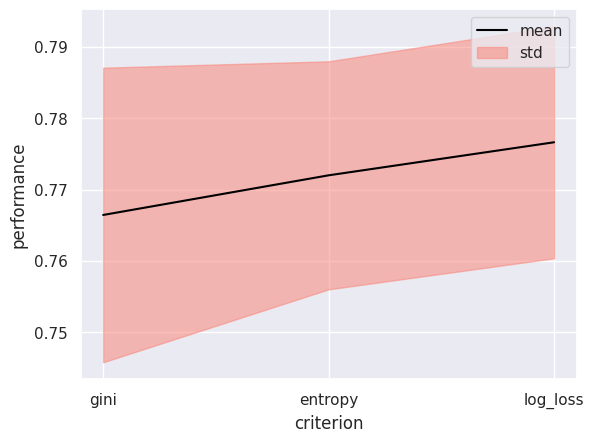

In [ ]:
show_curve_DT_Criterion()

56

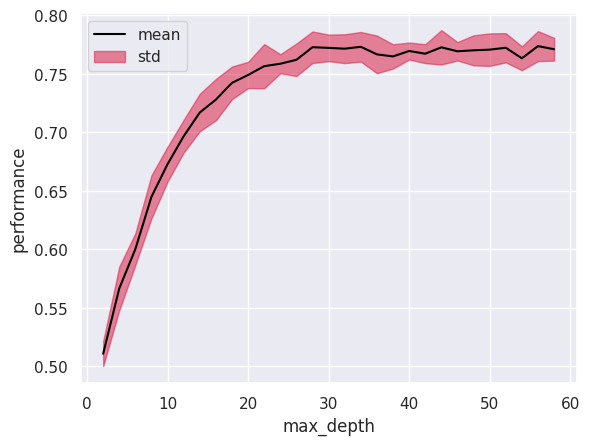

In [ ]:
show_curve_DT_Depth()

In [ ]:
DT = DecisionTreeClassifier(criterion='log_loss', max_depth=56)
DT.fit(X_train,y_train)
y_pred_DT =DT.predict(X_test)
print(accuracy_score(y_pred_DT, y_test))
s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_DT))

0.75
accuracy con cross validation 0.77720 (+/- 0.00718)
              precision    recall  f1-score   support

           0       0.39      0.26      0.31       105
           1       0.60      0.97      0.75       159
           3       0.22      0.20      0.21        95
           4       0.59      0.50      0.54        98
           5       0.37      0.31      0.34       108
           6       0.46      0.44      0.45        99
           7       0.38      0.20      0.26       102
           8       0.95      0.98      0.97       857
           9       0.96      1.00      0.98       105

    accuracy                           0.75      1728
   macro avg       0.55      0.54      0.53      1728
weighted avg       0.73      0.75      0.73      1728



In [ ]:
#@title Random Forest
RF = RandomForestClassifier() #los parametros más importantes on maxdepth and n_estimators
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_RF))

0.8003472222222222
accuracy con cross validation 0.81829 (+/- 0.01883)
              precision    recall  f1-score   support

           0       0.62      0.24      0.34       105
           1       0.52      0.97      0.68       159
           3       0.33      0.14      0.19        95
           4       0.61      0.82      0.70        98
           5       0.90      0.71      0.79       108
           6       0.56      0.27      0.37        99
           7       0.59      0.46      0.52       102
           8       0.95      1.00      0.97       857
           9       0.94      1.00      0.97       105

    accuracy                           0.80      1728
   macro avg       0.67      0.62      0.62      1728
weighted avg       0.79      0.80      0.78      1728



'gini'

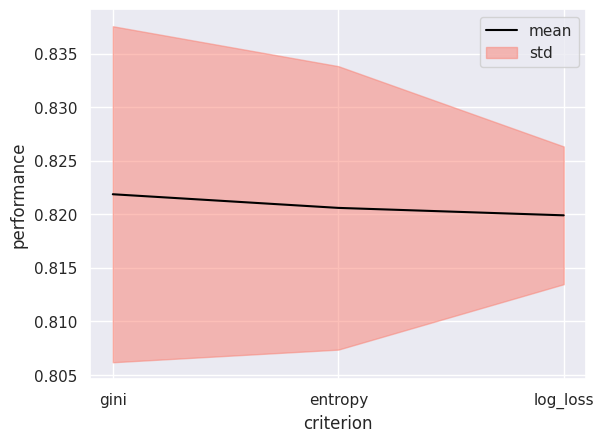

In [ ]:
show_curve_RF_Criterion()

30

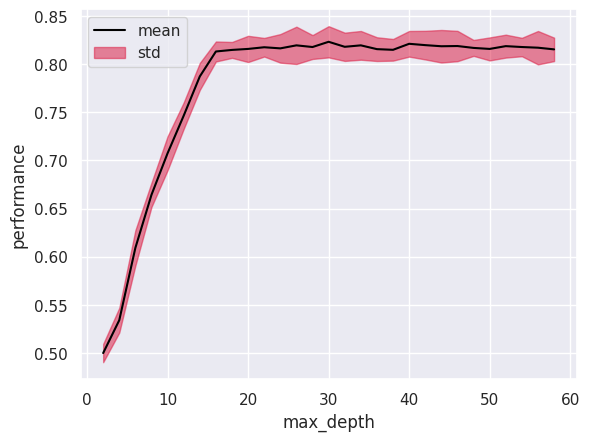

In [ ]:
show_curve_RF_Depth()

370

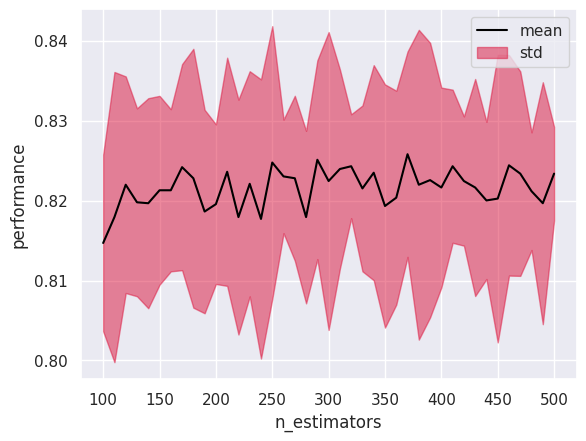

In [ ]:
show_curve_RF_Estimator()

In [18]:
RF = RandomForestClassifier(n_estimators= 370, criterion='gini' , max_depth= 30) #los parametros más importantes on maxdepth and n_estimators
RF.fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_RF))

0.8084490740740741
accuracy con cross validation 0.82720 (+/- 0.01638)
              precision    recall  f1-score   support

           0       0.62      0.22      0.32       105
           1       0.52      0.92      0.67       159
           3       0.40      0.18      0.25        95
           4       0.61      0.82      0.70        98
           5       0.89      0.78      0.83       108
           6       0.58      0.33      0.42        99
           7       0.59      0.50      0.54       102
           8       0.97      1.00      0.99       857
           9       0.93      1.00      0.96       105

    accuracy                           0.81      1728
   macro avg       0.68      0.64      0.63      1728
weighted avg       0.80      0.81      0.79      1728



In [19]:
#@title SVM (lineal)
SVM_ln = SVC(kernel='linear')
SVM_ln.fit(X_train,y_train)
y_pred_SVM_ln = SVM_ln.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_ln))

0.8084490740740741
accuracy con cross validation 0.58079 (+/- 0.01419)
              precision    recall  f1-score   support

           0       0.33      0.01      0.02       105
           1       0.25      0.75      0.37       159
           3       1.00      0.02      0.04        95
           4       0.00      0.00      0.00        98
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        99
           7       0.00      0.00      0.00       102
           8       0.72      1.00      0.84       857
           9       0.00      0.00      0.00       105

    accuracy                           0.57      1728
   macro avg       0.26      0.20      0.14      1728
weighted avg       0.46      0.57      0.45      1728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5.5600000000000005

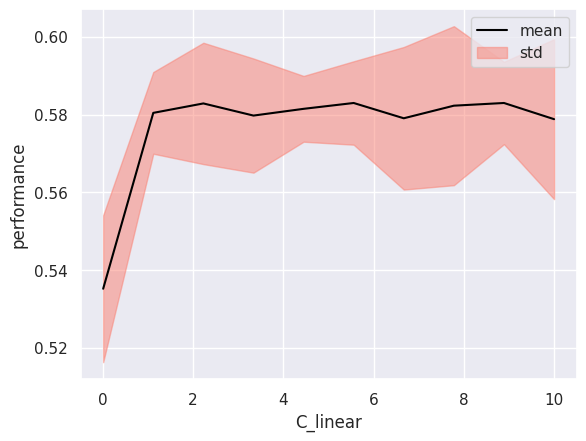

In [22]:
show_curve_SVC_C_ln()

In [ ]:
SVM_ln = SVC(C= 5.56,kernel='linear')
SVM_ln.fit(X_train,y_train)
y_pred_SVM_ln = SVM_ln.predict(X_test)
print(accuracy_score(y_pred_RF, y_test))
s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_ln))

In [ ]:
#@title SVM (polynomial)
SVM_poly = SVC(kernel='poly')
SVM_poly.fit(X_train,y_train)
y_pred_SVM_poly = SVM_poly.predict(X_test)
print(accuracy_score(y_pred_SVM_poly, y_test))
s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_poly))

8.89

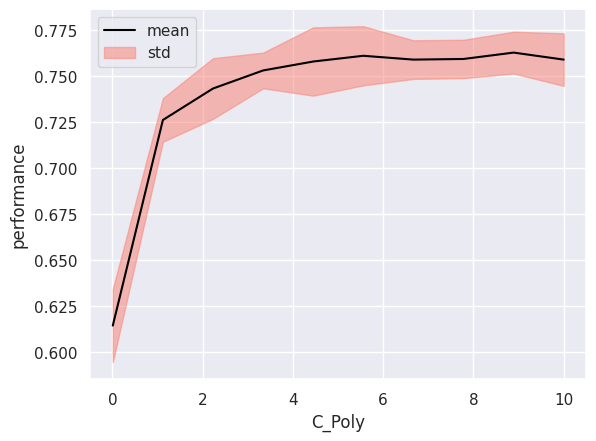

In [23]:
show_curve_SVC_C_poly()

In [ ]:
show_curve_SVC_degree_poly()

In [ ]:
SVM_poly = SVC(C= , kernel='poly', degree=)
SVM_poly.fit(X_train,y_train)
y_pred_SVM_poly = SVM_poly.predict(X_test)
print(accuracy_score(y_pred_SVM_poly, y_test))
s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_poly))

In [ ]:
#@title SVM (RBF)
SVM_rbf = SVC()
SVM_rbf.fit(X_train,y_train)
y_pred_SVM_rbf= SVM_rbf.predict(X_test)
print(accuracy_score(y_pred_SVM_rbf, y_test))
s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_rbf))

In [ ]:
show_curve_SVC_C_rbf()

In [ ]:
SVM_rbf = SVC(C= , kernel='rbf')
SVM_rbf.fit(X_train,y_train)
y_pred_SVM_rbf= SVM_rbf.predict(X_test)
print(accuracy_score(y_pred_SVM_rbf, y_test))
s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy con cross validation %.5f (+/- %.5f)"%(np.mean(s), np.std(s)))
print(classification_report(y_test, y_pred_SVM_rbf))